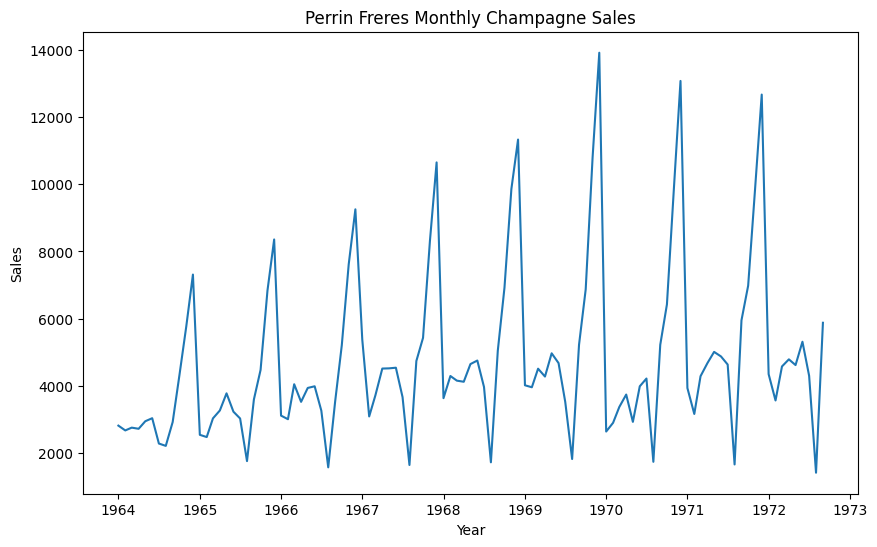

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('Perrin.csv')
df.Month = pd.to_datetime(df.Month)
df.set_index('Month', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(df)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Perrin Freres Monthly Champagne Sales')
plt.show()



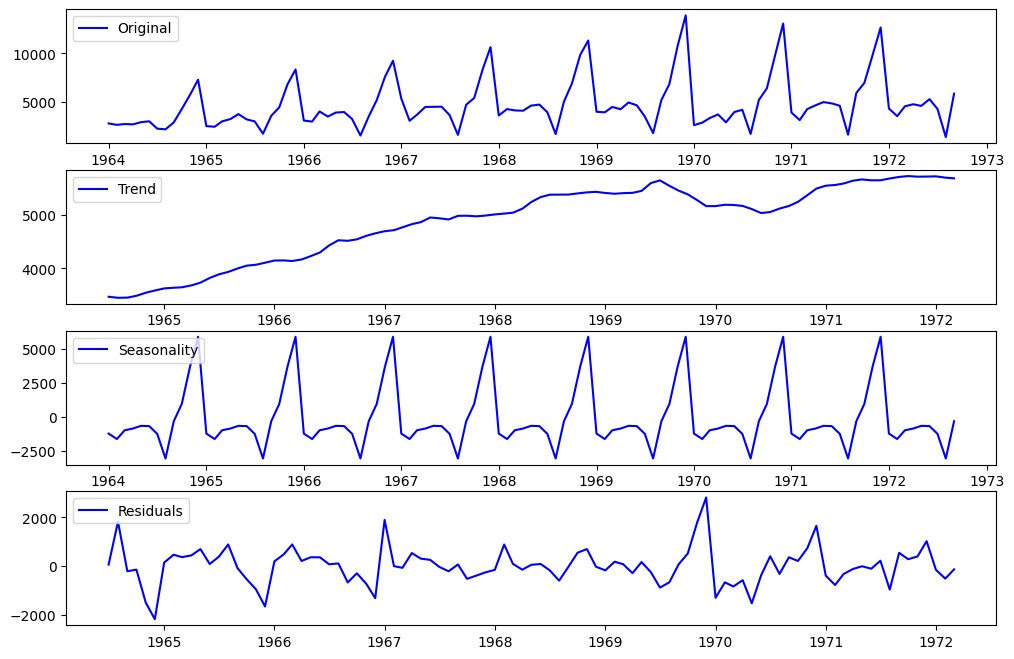

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df, period=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df, label='Original', color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='upper left')
plt.show()


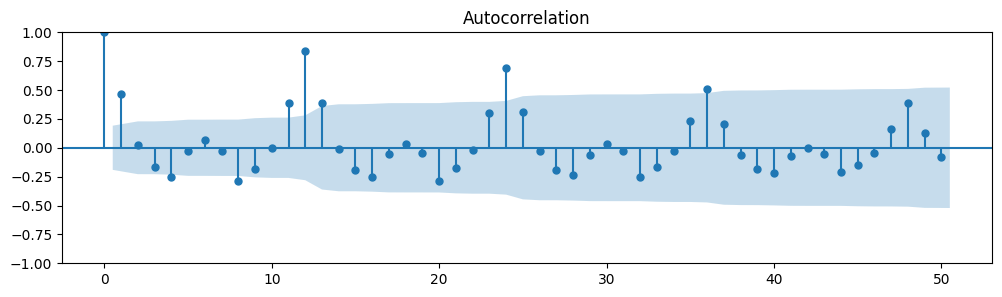

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


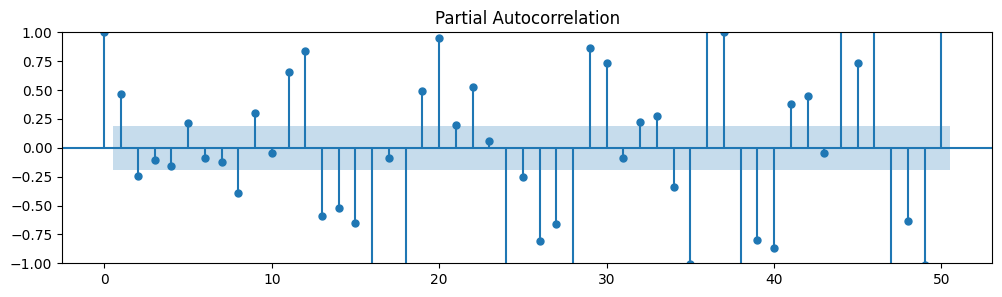

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(figsize=(12,3))
plot_acf(df, lags=50, ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(12,3))
plot_pacf(df, lags=50, ax=ax)
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df, order=(1,0,0), seasonal_order=(1,1,0,12))
results = model.fit()
print(results.summary())


                                    SARIMAX Results                                     
Dep. Variable:                            Sales   No. Observations:                  105
Model:             ARIMA(1, 0, 0)x(1, 1, 0, 12)   Log Likelihood                -750.380
Date:                          Mon, 03 Apr 2023   AIC                           1506.760
Time:                                  08:33:02   BIC                           1514.358
Sample:                              01-01-1964   HQIC                          1509.828
                                   - 09-01-1972                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2977      0.067      4.433      0.000       0.166       0.429
ar.S.L12      -0.0919      0.084     -1.087      0.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


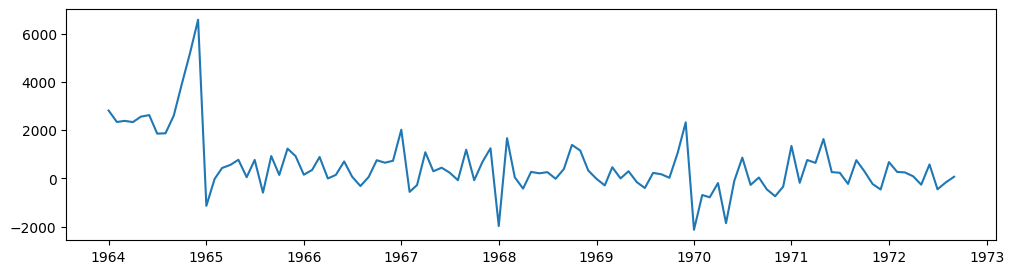

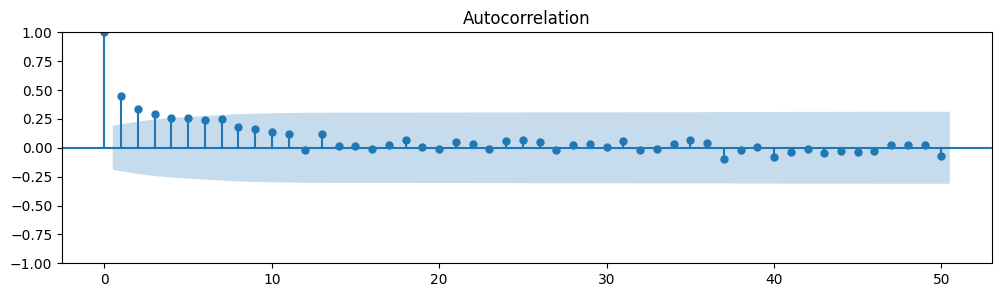

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


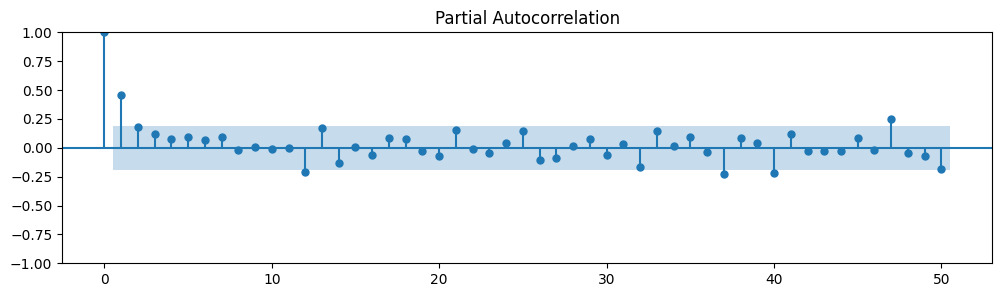

In [ ]:
residuals = results.resid
fig, ax = plt.subplots(figsize=(12,3))
plt.plot(residuals)
plt.show()

fig, ax = plt.subplots(figsize=(12,3))
plot_acf(residuals, lags=50, ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(12,3))
plot_pacf(residuals, lags=50, ax=ax)
plt.show()


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


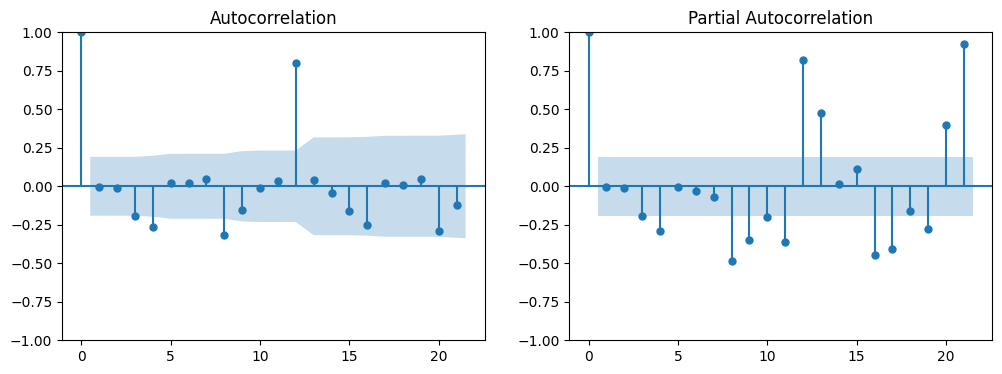

Ljung-Box test p-value: e


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

model = ARIMA(df, order=(2,1,2))
results = model.fit()


fig, ax = plt.subplots(1,2,figsize=(12,4))
plot_acf(results.resid, ax=ax[0])
plot_pacf(results.resid, ax=ax[1])
plt.show()


lbvalue, pvalue = acorr_ljungbox(results.resid, lags=10)
print('Ljung-Box test p-value:', pvalue[-1])


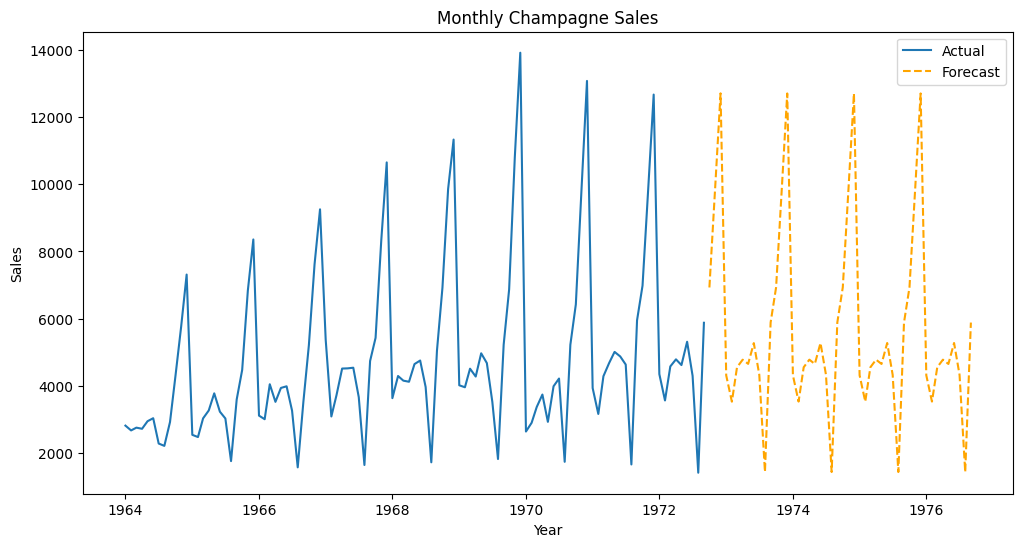

In [ ]:

forecast = results.forecast(steps=48)


plt.figure(figsize=(12,6))
plt.plot(df)
plt.plot(forecast, linestyle='--', color='orange')
plt.title('Monthly Champagne Sales')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(['Actual', 'Forecast'])
plt.show()


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


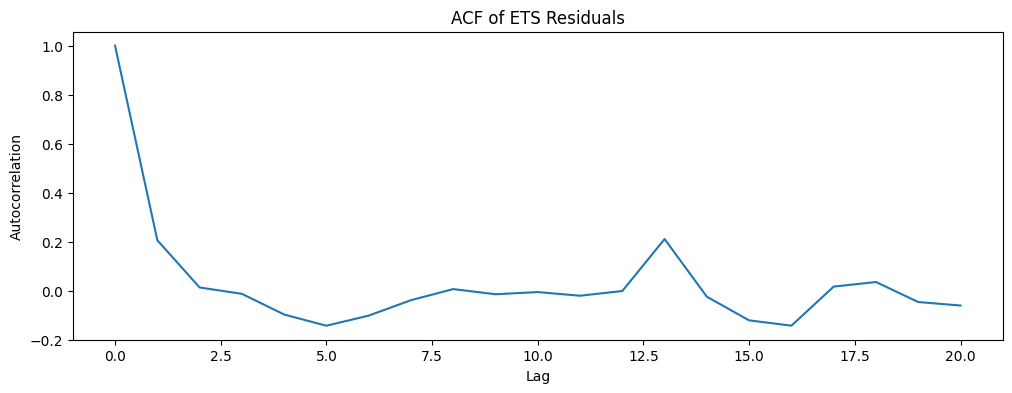

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from statsmodels.tsa.stattools import acf


model = ExponentialSmoothing(df, trend='add', seasonal='add', seasonal_periods=12)
results = model.fit()

plt.figure(figsize=(12,4))
plt.plot(acf(results.resid, fft=True))
plt.title('ACF of ETS Residuals')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()
